# Sector State Metrics Dashboard

## Setting-up

In [1]:
%load_ext autotime

%load_ext autoreload

%autoreload 2

time: 22.9 ms (started: 2021-02-12 11:16:43 -03:00)


In [2]:
# External depences
import pandas as pd
import numpy as np
import plotly.express as px

# Move path to parent folder
import sys
sys.path.insert(1, '../')

# Internal dependences
from filecoin_metrics.connection import get_connection, get_connection_string
from filecoin_metrics.metrics import *


time: 1.82 s (started: 2021-02-12 11:16:44 -03:00)


In [3]:
conn_string = get_connection_string('../config/sentinel-conn-string.txt')
connection = get_connection(conn_string)


time: 3.55 s (started: 2021-02-12 11:16:46 -03:00)


## Visualizations

#### Rate of missing PoST, weekly, network-wide

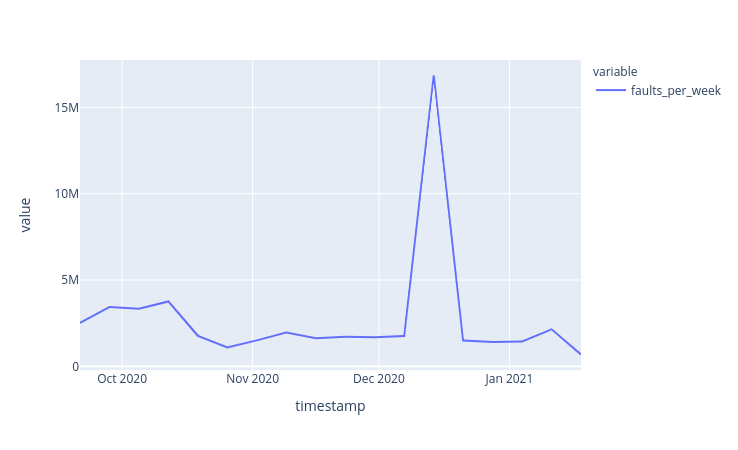

time: 52.4 s (started: 2021-02-05 16:59:53 -03:00)


In [4]:
s = rate_missing_post_network_weekly(connection)
px.line(s)

#### Fraction of active sectors with Missing PoST, weekly, network-wide

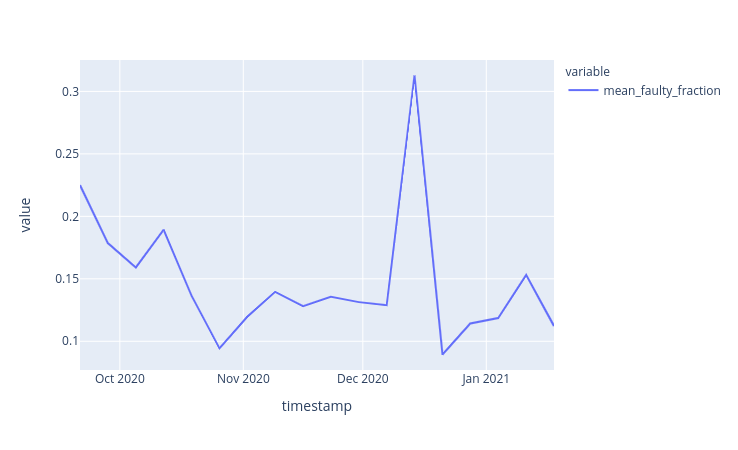

time: 49.9 s (started: 2021-02-05 17:00:47 -03:00)


In [5]:
s = fraction_missing_post_network_weekly(connection)
px.line(s)

#### Rate of missing PoST, weekly, per miner

d = rate_missing_post_miner_weekly(connection)

#### Declare Fault count per miner, top 10

s = declare_fault_count_per_miner(connection)
print(s.sort_values(ascending=False).head(10))

#### Declare Fault rate, weekly, network-wide

In [6]:
from filecoin_metrics.metrics import declare_fault_weekly

s = declare_fault_weekly(connection)

fig_df = s.reset_index()

fig = px.bar(fig_df,
             x='timestamp',
             y='declare_fault_count',
             title='Weekly Declare Fault Count',
             log_y=True)
fig.show() 

time: 1.2 s (started: 2021-02-12 11:17:13 -03:00)


#### Rate of early termination, weekly, network-wide

#### Average termination fee, weekly, network-wide

#### Upcoming sector expiration, monthly, network-wide

In [8]:
df = upcoming_sector_expiration_by_week(connection)

fig_df = df.reset_index().groupby('expiration_epoch').sum().reset_index()
fig_df = fig_df.resample('1m', on='expiration_epoch').sum()

px.bar(fig_df.reset_index(),
        x='expiration_epoch',
        y='sector_count',
        title='Upcoming Sector Expiration',
        labels={'value': 'Sectors',
                'time': 'Timestamp'})

time: 4min 44s (started: 2021-02-12 11:17:54 -03:00)


#### Upcoming sector expiration, monthly, per miner

### Renewal Events

In [7]:
from filecoin_metrics.metrics import renewal_count_per_epoch

s = renewal_count_per_epoch(connection)
INTERVAL = '1w'

s_count = (s.resample(INTERVAL)
            .sum()
            .backfill()
          )

s_cum = (s.cumsum()
          .resample(INTERVAL)
          .median()
          .backfill()
        )

s_cum.name = 'renewal_count_cumulative'

fig_df = (pd.DataFrame([s_count, s_cum])
            .T
            .reset_index()
            .melt(id_vars=['timestamp'])
            )

fig = px.bar(fig_df,
             x='timestamp',
             y='value',
             title='Renewal Events Count',
             facet_col='variable',
             log_y=True)
fig.show() 


time: 12.3 s (started: 2021-02-12 11:17:23 -03:00)


In [ ]:
from filecoin_metrics.metrics import *


#### Renewal Gap, weekly, per miner

time: 10.3 ms (started: 2021-02-12 10:02:16 -03:00)
